In [15]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [16]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
from pylab import *

In [17]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

In [18]:
from maskrcnn_benchmark.config import cfg
from predictor import COCODemo

In [19]:
#config_file = "../configs/caffe2/e2e_mask_rcnn_X_101_32x8d_FPN_1x_caffe2.yaml"
#config_file = "../configs/quick_schedules/e2e_mask_rcnn_R_50_FPN_quick.yaml"
config_file = "../configs/caffe2/e2e_mask_rcnn_R_50_FPN_1x_caffe2.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

In [20]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
)

AttributeError: 'ResNet' object has no attribute 'layer1'

In [21]:
def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

# from http://cocodataset.org/#explore?id=345434
image = load("http://farm3.staticflickr.com/2469/3915380994_2e611b1779_z.jpg")
imshow(image)

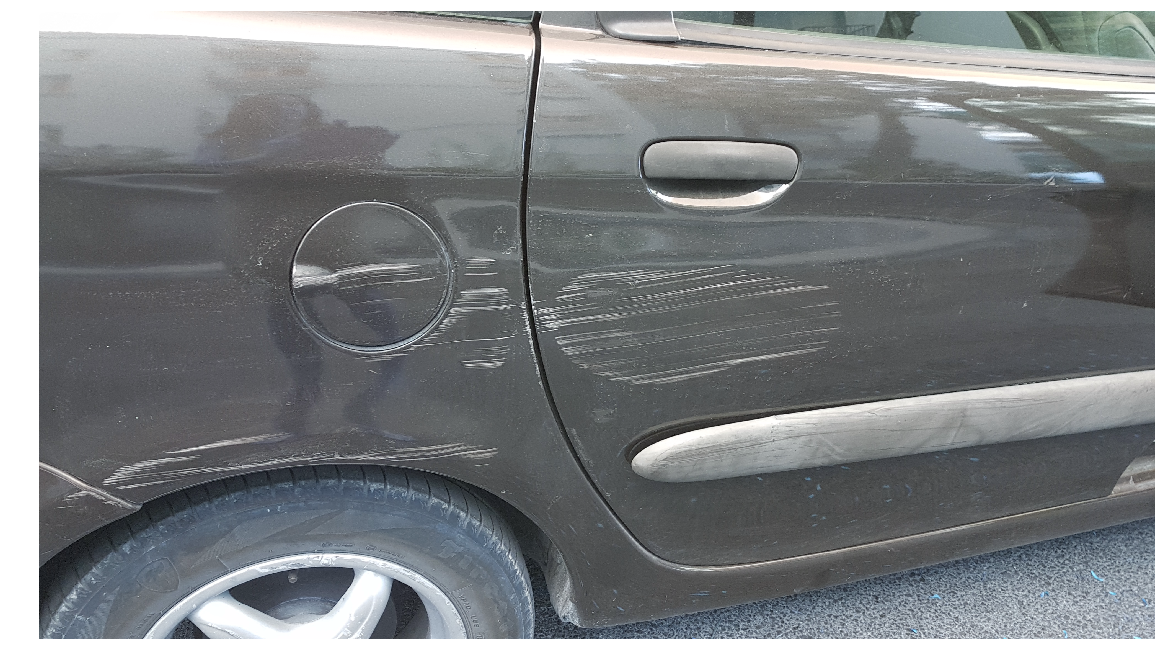

In [25]:
# from http://cocodataset.org/#explore?id=345434
image1 = array(Image.open("images/test1.jpg"))
imshow(image1)

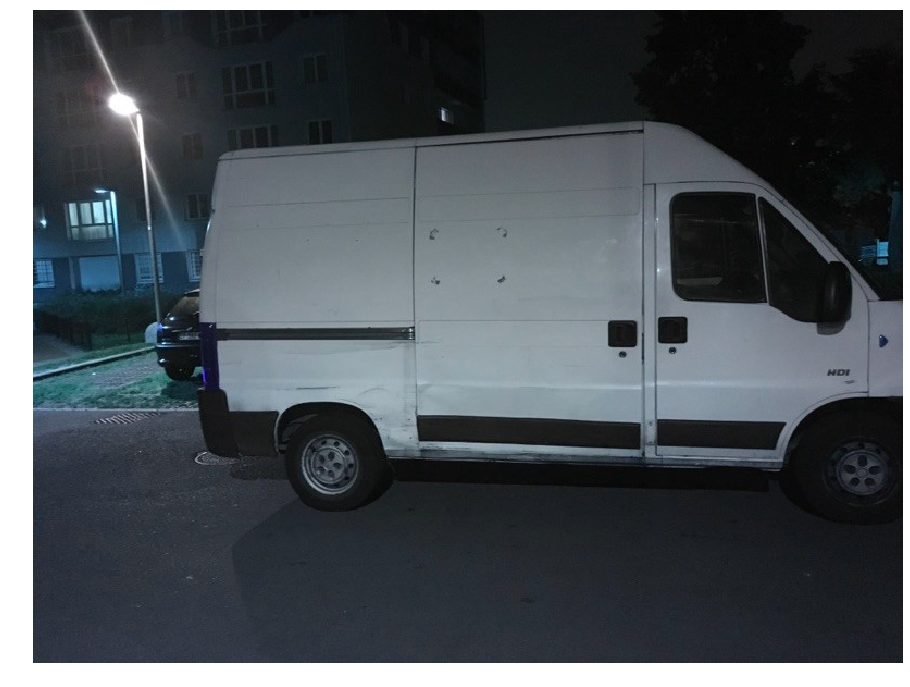

In [28]:
# from http://cocodataset.org/#explore?id=345434
image2 = array(Image.open("images/damage-2.jpg"))
imshow(image2)

# Predictions

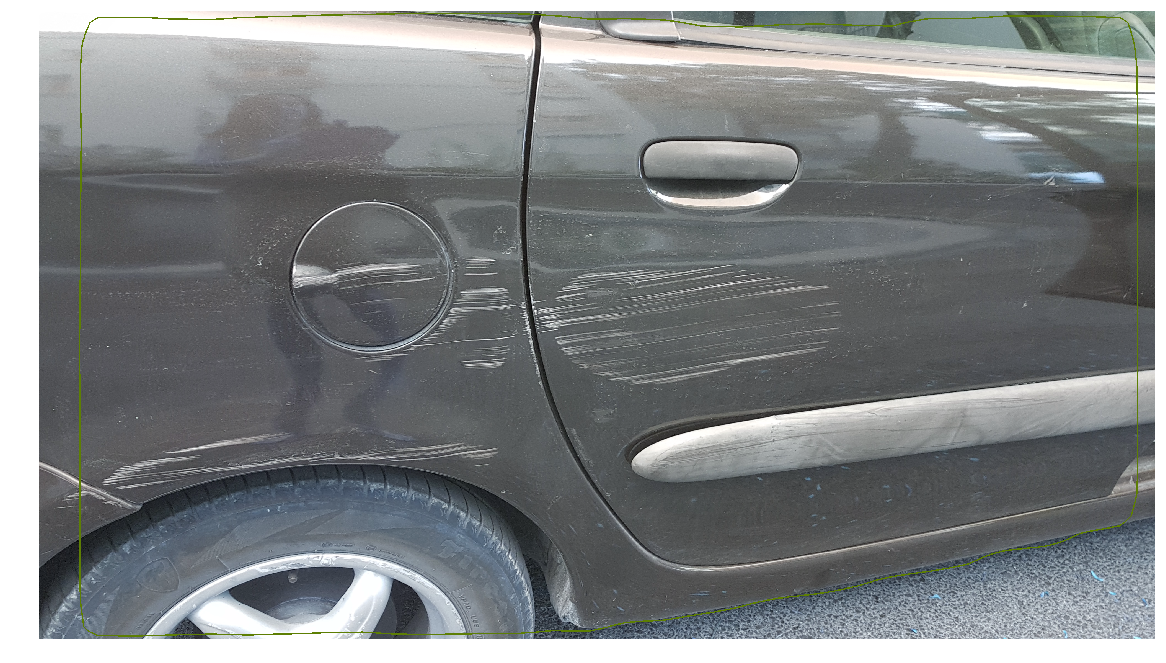

In [26]:
# compute predictions
predictions = coco_demo.run_on_opencv_image(image1)
imshow(predictions)

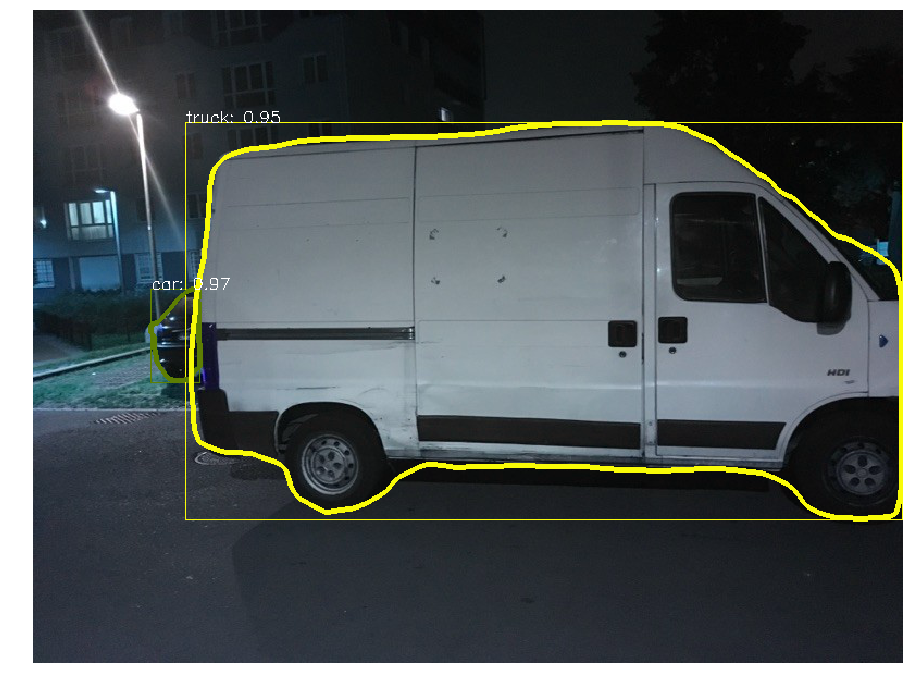

In [29]:
# compute predictions
predictions = coco_demo.run_on_opencv_image(image2)
imshow(predictions)